In [9]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    log_loss,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
# 2. Load and Preprocess Data
# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)

# Select relevant features
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype(int)  # Ensure target variable is integer (0 or 1)
print (df.head())
# Separate input features and target label
X = df.drop('churn', axis=1).values
y = df['churn'].values

# Standardize the feature values
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

   tenure   age  address  income   ed  employ  equip  churn
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0      1
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0      1
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0      0
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0      0
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0      0


In [11]:
# 3. Split Dataset

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [12]:
# 4. Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# 5. Predict and Evaluate

# Predict class labels
y_pred = model.predict(X_test)

# Predict class probabilities
y_prob = model.predict_proba(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print log loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.50      0.44      0.47         9

    accuracy                           0.78        40
   macro avg       0.67      0.66      0.66        40
weighted avg       0.77      0.78      0.77        40

Confusion Matrix:
[[27  4]
 [ 5  4]]
Log Loss: 0.4069


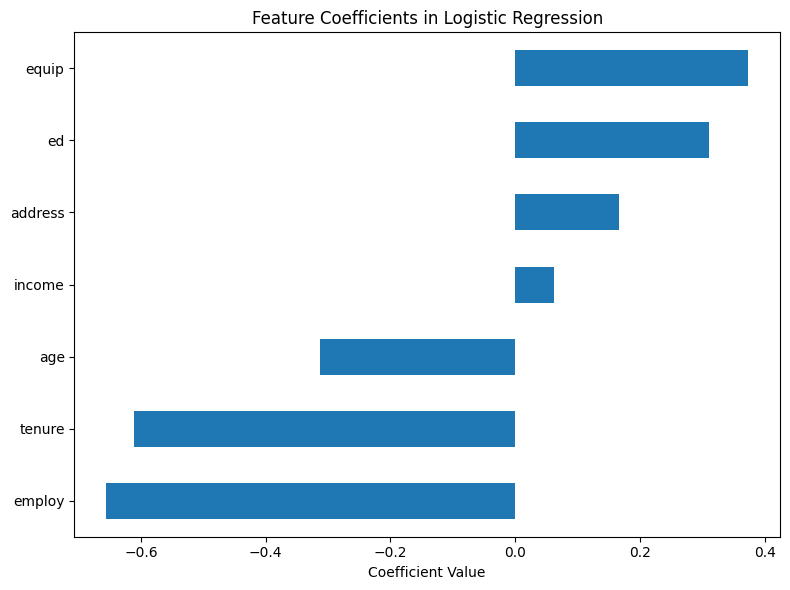

In [14]:
# 6. Visualize Feature Coefficients

coef = pd.Series(model.coef_[0], index=df.columns[:-1])
plt.figure(figsize=(8, 6))
coef.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

# Interpretation:
# Positive coefficients indicate higher churn likelihood.
# Negative coefficients indicate retention.

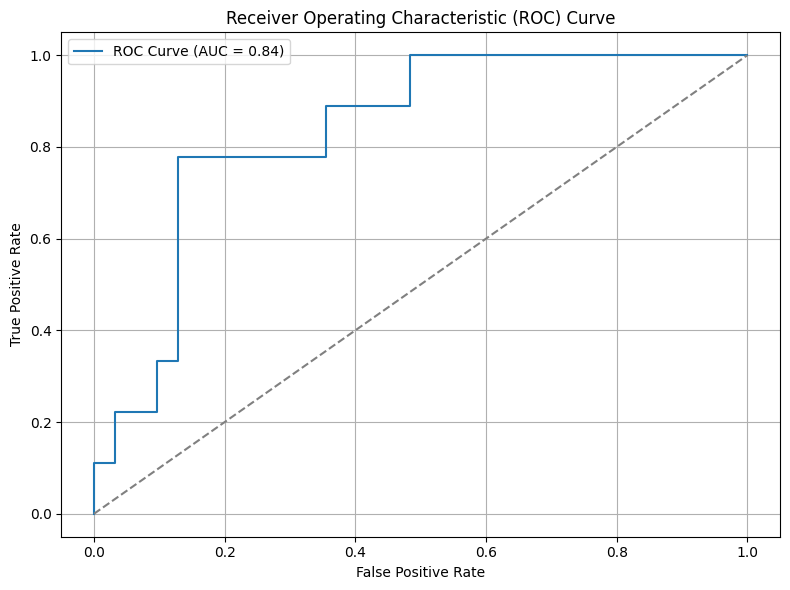

In [15]:
# 7. Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# 8. Summary
print(" Logistic Regression model completed.")
print(" ROC AUC Score:", round(roc_auc, 2))
print(" Log Loss:", round(logloss, 4))

 Logistic Regression model completed.
 ROC AUC Score: 0.84
 Log Loss: 0.4069
